In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random

In [2]:
class Multiple_linear_regression():
    def __init__(self,y,xn,names='None'):
        self.y=y
        self.xn=xn
        self.names=names
        pass
    
# Эта функция считает среднее значение

    def mean(m):
        summ=0
        for i in range(len(m)):
            summ += m[i]
        summ = summ/len(m)
        return summ   
    
# Эта функцция считает стандартное отлонение и дисперсию

    def stdev_disp(m):
        disp=0
        mm = Multiple_linear_regression.mean(m)
        for i in range(len(m)):
            disp += (m[i] - mm)**2
        disp = disp/(len(m)-1)
        stdev = disp**(1/2)
        return stdev,disp
         
# Эта функция считает корреляцию и ковариацию

    def corr(y,xn):
        ym=Multiple_linear_regression.mean(y)
        cov=0
        for i in range(len(y)):
            for j in range(len(xn)):
                cov += (ym - y[i])*(Multiple_linear_regression.mean(xn[j]) - xn[j][i])
        cov = cov/((len(y)-1))
        c=Multiple_linear_regression.stdev_disp(y)[0]
        for i in range(len(xn)):
            c *= Multiple_linear_regression.stdev_disp(xn[i])[0]
        cor = cov/c
        return cor,cov
    
# Эта фцнкция считает коэффициенты для множественнойлинейной регресси по формуле:
# b1i = (stdev(y)/stdev(xi))*(cor(y,xi) - cor(y,xj) * cor(xi,xj) / (1 - cor(xi,xj)^2))
# Это единстевенная формула, которая подбирает коэффициенты для более чем одного прризнака,
# но работает она только для двух признаков, в этой функции они будут выибраться по максимальной дисперсии по мдулю

    def standard_linear_regression_formula(self,y = 'None', xn = 'None'):
        if y == 'None':
            y=self.y
        if xn =='None':
            xn=self.xn
        corxn = []
        for i in range(len(xn)):
            corxn.append(Multiple_linear_regression.corr(y,[xn[i]])[0])
        xn_new = []
        index = corxn.index(max(corxn,key = abs))
        corxn.pop(index)
        index1 = corxn.index(max(corxn, key = abs))
        xn = [xn[index],xn[index1]]    
        cor = Multiple_linear_regression.corr(y,xn)[0]
        b1n=[]
        b0n=[]
        corn=[]
        new_xn=[]
        y_st = Multiple_linear_regression.stdev_disp(y)[0]
        b0=Multiple_linear_regression.mean(y)
        test = 0
        for i in range(len(xn)):
            cor_xn = Multiple_linear_regression.corr(y,[xn[i]])[0]
            new_xn = [j for j in xn if j != xn[i]]
            cor_xn1 = Multiple_linear_regression.corr(y,new_xn)[0]
            cor_xn2 = Multiple_linear_regression.corr(xn[i],new_xn)[0]
            x1 = y_st/Multiple_linear_regression.stdev_disp(xn[i])[0]
            x2 = x1*(cor_xn - cor_xn1 * cor_xn2)/((1 - cor_xn2**2)*((len(y) -1)/(len(y) - len(xn) -1)))
            b1n.append(x2)
            b0 -= Multiple_linear_regression.mean(xn[i]) * b1n[i]
        return b1n,b0,xn
        
# Это функция считает сумму квадратов ошибок

    def L(self,b1n,b0):
        y=self.y
        xn=self.xn
        summ=0
        for i in range(len(y)):
            bx = b0
            for j in range(len(xn)):
                bx += b1n[j] * xn[j][i] 
            summ= summ + (y[i] - bx)**2
        summ = summ/(len(y) - len(xn) -1)
        return summ
    
# Эта функция считает коэффициенты для линейной регрессии методом градиентного спуска:
# берется производная по функции потерь: L = (y'-(b0 + b1 * x + b1i * xi + ...))^2
# частная производная по dL/db0 = -2 * (y' - b0 - b1 * x) * alpha1
# часиная производная по dL/dbi = -2bi * (y' - b0 - b1 * x1 - b1i * x1i - ...) * alpha2
# частные производные будут указывать на направление и скорость изменения функции, 
# если из переменных вычитать градиенты(частные производдные), функция будет стремится
# к одному из локальных миниумов функции потерь, чтобы найти глобальный миниум модель будет тестироватьсяна разных начальных
# данных коэффициентов, alpha1 и alpha2 служат ограничителями, чтобы градиент не перепрыгнул значение минимума
# за y',x,xi,... взяты их средние значения

    def grad_b0_b1(self,y = 'None',xn='None'):
        if y == 'None':
            y=self.y
        if xn == 'None':
            xn=self.xn
        alfa_b1 = 1/(10*len(xn) *Multiple_linear_regression.mean(y))
        alfa_b0 = 1/(50*len(xn) *Multiple_linear_regression.mean(y))
        mean_y = Multiple_linear_regression.mean(y)
        L = {}
        step = round(Multiple_linear_regression.stdev_disp(y)[0]/2)
        b0max=round(max(y))
        cor = []
        for i in range(len(xn)):
            cor.append(Multiple_linear_regression.corr(y,[xn[i]])[0])
        for j in range(-b0max,b0max,step):
            b0=j
            for j1 in range(-5,5):
                b1n=[j1] * len(xn)
                b1x = mean_y - b0
                for i in range(len(xn)):
                    b1x -= b1n[i] * Multiple_linear_regression.mean(xn[i])
                for i in range(10):
                    b0 += -2 * alfa_b0 * b1x 
                for i in range(10):
                    for i in range(len(xn)):
                        b1n[i] += -2 * alfa_b1 * Multiple_linear_regression.mean(xn[i]) * b1x  * cor[i] **3
                L[Multiple_linear_regression.L(self,b1n,b0)] = b1n,b0
        index = min(L)
        return L[index][0],L[index][1]
    
# Эта функция сроит графики с данными тестовой выборки и угаданных значений

    def plot_all(self,testy,predy,xntest):
        i=1
        plt.figure(figsize=[11, 9])
        sns.set()
        for j in range(len(xntest)):
            plt.subplot(2,2,i)
            plt.scatter(xntest[j],ytest,s=50,label='MEDV')
            plt.scatter(xntest[j],pred_grad,s=50,label='predict MEDV')
            plt.legend(loc = 'upper center')
            plt.xlabel(names[j])
            plt.ylabel('MEDV')
            if i%4 == 0:
                plt.show()
                i = 0
                plt.figure(figsize=[11, 9])
            i+=1
        
# Эта функция разбивает выборку на тренировочную и тестовую

    def train_test(self,train,test,method='None'):
        y=self.y
        xn=self.xn
        if method == 'Standart':
            xn = Multiple_linear_regression.standard_linear_regression_formula(self)[2]
        ytest=[]
        xntrain=[]
        xntest=[]
        ytrain=[]
        n1 = train * len(y)
        n2 = test * len(y)
        n=[]
        for i in range(round(len(xn))):
            xntrain.append([])
            xntest.append([])
        for i in range(len(y)):
            n.append(i)
        for i in range(round(n1)-1):
            index=random.choice(n)
            ytrain.append(y[index])
            for j in range(len(xn)):
                xntrain[j].append(xn[j][index])
            n.remove(index)
        for i in range(round(n2)-1):
            index=random.choice(n)
            ytest.append(y[index])
            for j in range(len(xn)):
                xntest[j].append(xn[j][index])
            n.remove(index) 
        return xntrain,ytrain,xntest,ytest
    
# Это функция обучения модели

    def fit(self,trainy,trainxn,method='None'):
        if method == 'Standart':
            st_b0 = Multiple_linear_regression.standard_linear_regression_formula(self, trainy,trainxn)[1]
            st_b1n = Multiple_linear_regression.standard_linear_regression_formula(self, trainy,trainxn)[0]
            return st_b1n, st_b0
        if method == 'Gradient':
            grad_b0 = Multiple_linear_regression.grad_b0_b1(self,trainy,trainxn)[1]
            grad_b1n = Multiple_linear_regression.grad_b0_b1(self,trainy,trainxn)[0]
            return grad_b1n,grad_b0
    
# Эта функция предсквазывает значения целевой переменной по тестовой выборке

    def predict(self,b1n,b0,xntest,method='None'):
        y = self.y
        xn=self.xn
        if method == 'Standart':
            xn = Multiple_linear_regression.standard_linear_regression_formula(self)[2]
        pred_y = []
        for i in range(len(xntest[0])):
            B0 = b0
            for j in range(len(xn)):
                B0 += b1n[j] * xn[j][i]
            pred_y.append(B0)
        return pred_y
    
# Эта функция считает коэффициент множественной детерминации

    def determ(self,ytest,pred_y):
        xn=self.xn
        ym = Multiple_linear_regression.mean(ytest)
        ch=0
        zn=0        
        mean = 0
        mean1 = 0
        for i in range(len(ytest)):
            ch += (ytest[i] - pred_y[i])**2
            zn += (ytest[i] - ym)**2
        det = ch/zn
        print('Данная модель может описать ', round((round(det%10) +1 - det)*100,2), '% дисперсии данной выборки') 

Модель будет протестирована на датасете цен жилья в Бостоне

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

C:\Users\Tosha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Фичи:
CRIM - уровень преступности на душу населения по городам
ZN - доля жилой земли, зонированной на участки площадью более 25 000 кв.футов.
INDUS - доля акров, не связанных с розничной торговлей, на город.
CHAS - Чарльз (1, если тракт ограничивает реку; 0 в противном случае)
NOX - концентрация оксидов азота (частей на 10 миллионов)
RM - среднее количество комнат в жилом помещении
AGE - доля квартир, занятых владельцами, построенных до 1940 года
DIS- расстояния до пяти бостонских центров занятости
RAD - индекс доступности к радиальным магистралям
TAX - полная стоимость недвижимости -ставка налога за 10 000 долларов
PTRATIO- соотношение учащихся и учителей по городам
B - 1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам
LSTAT - % более низкого статуса населения

Целевая перменная:
MEDV - Средняя стоимость домов, занятых владельцами, в 1000 долларов

Фичей достаточно много, поэтому стоит проверить их на мультиколлинеарность и посмотреть на их размерность

<AxesSubplot:>

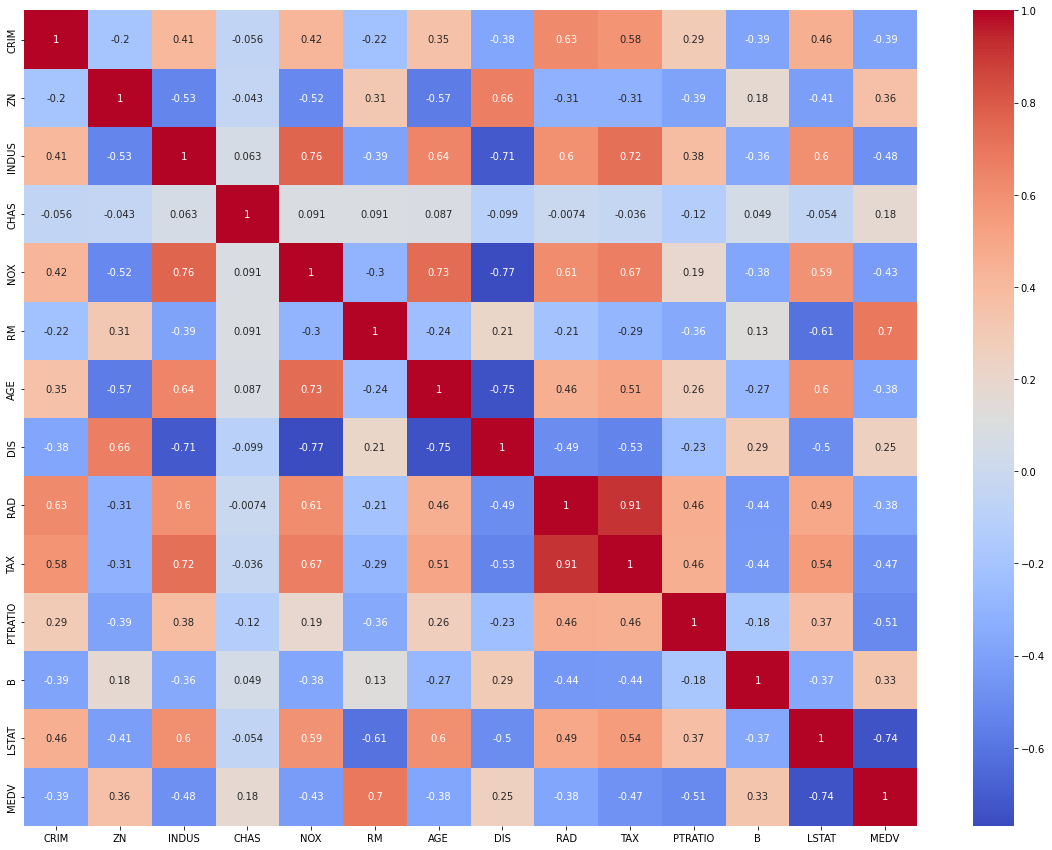

In [4]:
plt.figure(figsize=(20,15))
sns.heatmap(boston.corr(),annot=True,cmap='coolwarm')

In [5]:
# Средние значения
boston.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

Почти все фичи достаточно хорошо коррелируют с целевой переменной, но есть и  те которые сильно кореллируют друг с другом, следствием этого может быть переобучение модели. Также есть данные, размерность которых сильно превышает остальные, с этой проблемой может справиться, к примеру,  логарифмирование данных, но для теста данной модели ими можно просто пренебречь

In [6]:
x1 = boston
y = boston['MEDV']
x1 = x1.drop(['MEDV','INDUS','AGE','TAX','DIS','NOX','B'],axis=1)
y = boston['MEDV'].to_list()
names = list(x1)
x=[]
for i in range(len(names)):
    x.append(x1[names[i]].to_list())

In [12]:
model = Multiple_linear_regression(y,x)
xntrain,ytrain,xntest,ytest = model.train_test(0.8,0.2,'Standart')
st = model.fit(ytrain,xntrain,'Standart')
pred_st = model.predict(st[0],st[1],xntest,'Standart')
model.determ(ytest,pred_st)

Данная модель может описать  66.08 % дисперсии данной выборки


Данная модель может описать  76.56 % дисперсии данной выборки


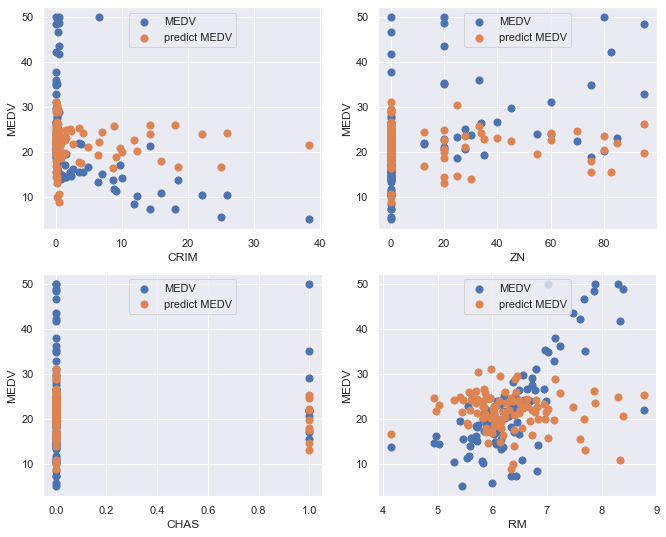

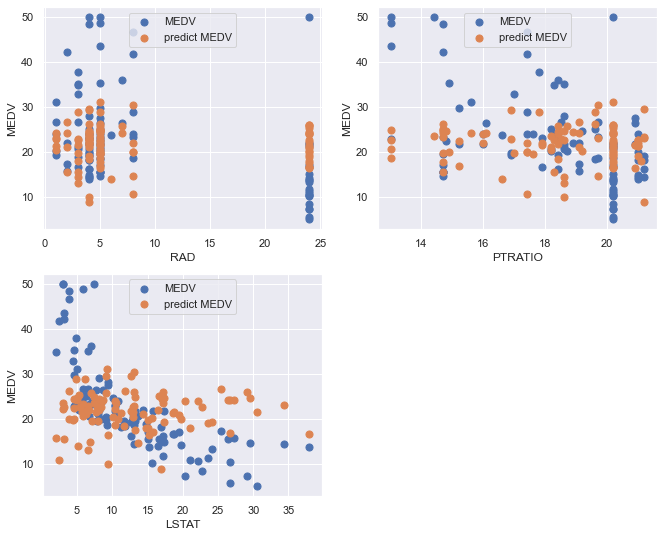

In [8]:
model = Multiple_linear_regression(y,x,names)
xntrain,ytrain,xntest,ytest = model.train_test(0.8,0.2)
grad = model.fit(ytrain,xntrain,'Gradient')
pred_grad = model.predict(grad[0],grad[1],xntest)
model.determ(ytest,pred_grad)
model.plot_all(ytest,pred_grad,xntest)